In [117]:
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV




import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Importing iris dataset

In [2]:
iris = load_iris()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)

# Random Forest Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier(random_state=42)
rf_cls.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## Important Features Selections

In [5]:
pd.Series(rf_cls.feature_importances_, index=iris.feature_names).sort_values(ascending=False)

petal length (cm)    0.449003
petal width (cm)     0.393175
sepal length (cm)    0.122098
sepal width (cm)     0.035724
dtype: float64

# Random Forest Classification 

In [6]:
rf_clf = RandomForestClassifier(random_state=42)
cv_rf = cross_val_predict(rf_clf, X_train, y_train, cv=10, n_jobs=4)

## performance measure

In [7]:
accuracy_score(y_train, cv_rf)

0.9481481481481482

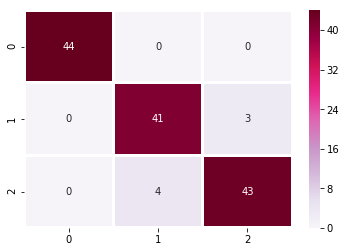

In [8]:
x = sns.heatmap(confusion_matrix(y_train, cv_rf), annot= True, cmap='PuRd', linewidths=2)

In [9]:
print(classification_report(cv_rf, y_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.93      0.91      0.92        45
          2       0.91      0.93      0.92        46

avg / total       0.95      0.95      0.95       135



### tune hyper parameters using GridSearchCV

In [10]:
parameters = {'max_features': [1,2,3,4],
             'n_estimators': [70, 80, 90],
            'max_depth': [1,2,3],
            }

In [11]:
rf_clf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rf_clf, param_grid=parameters, n_jobs=4, cv=10)

In [12]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_features': [1, 2, 3, 4], 'n_estimators': [70, 80, 90], 'max_depth': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
# best parameters
gs.best_params_

{'max_depth': 1, 'max_features': 3, 'n_estimators': 80}

### cross validate classifier with best hyper parameter

In [14]:
rf_clf = RandomForestClassifier(random_state=42, **gs.best_params_)
cv_rf = cross_val_predict(rf_clf, X_train, y_train, cv=10, n_jobs=4)

### performance measure

In [15]:
accuracy_score(y_train, cv_rf)

0.9555555555555556

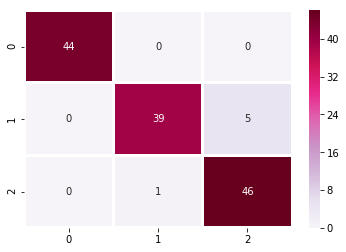

In [16]:
x = sns.heatmap(confusion_matrix(y_train, cv_rf), annot= True, cmap='PuRd', linewidths=2)

In [17]:
print(classification_report(cv_rf, y_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.89      0.97      0.93        40
          2       0.98      0.90      0.94        51

avg / total       0.96      0.96      0.96       135



# KNeighbors Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier

### preprocessing step

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)

### cross validate classifier

In [22]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
cv_knn = cross_val_predict(knn_clf, X_train_scaler, y_train, cv=10, n_jobs=4)

### performance measure

In [23]:
accuracy_score(y_train, cv_knn)

0.9481481481481482

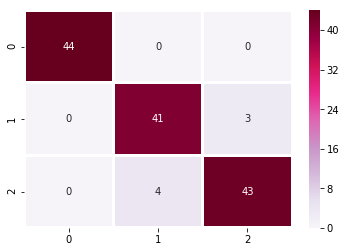

In [24]:
x = sns.heatmap(confusion_matrix(y_train, cv_knn), annot= True, cmap='PuRd', linewidths=2)

In [25]:
print(classification_report(cv_knn, y_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.93      0.91      0.92        45
          2       0.91      0.93      0.92        46

avg / total       0.95      0.95      0.95       135



# LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression

### cross validate classifier

In [27]:
log_clf = LogisticRegression()
cv_log = cross_val_predict(log_clf, X_train, y_train, cv=10, n_jobs=4)

### performance measure

In [28]:
accuracy_score(y_train, cv_log)

0.9555555555555556

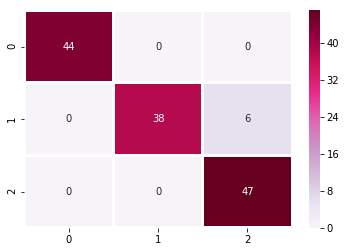

In [29]:
x = sns.heatmap(confusion_matrix(y_train, cv_log), annot= True, cmap='PuRd', linewidths=2)

In [30]:
print(classification_report(cv_log, y_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.86      1.00      0.93        38
          2       1.00      0.89      0.94        53

avg / total       0.96      0.96      0.96       135



# GradientBoostingClassifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

### cross validate classifier with default hyper para-meters

In [32]:
gb_clf = GradientBoostingClassifier(random_state=42)
cv_gb = cross_val_predict(gb_clf, X_train, y_train, cv=10, n_jobs=4)

### performance measure

In [33]:
accuracy_score(y_train, cv_gb)

0.9481481481481482

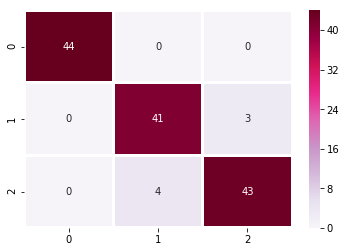

In [34]:
x = sns.heatmap(confusion_matrix(y_train, cv_gb), annot= True, cmap='PuRd', linewidths=2)

In [35]:
print(classification_report(cv_gb, y_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.93      0.91      0.92        45
          2       0.91      0.93      0.92        46

avg / total       0.95      0.95      0.95       135



### Tune hyper parameter with GridSearchCv

In [36]:
parameters = { 'max_depth': [1,2,3],
              'n_estimators': [10,20,30,40,50],
              'learning_rate': [0.1, 0.5, 1],
              }

In [37]:
gb_clf = GradientBoostingClassifier(random_state=42)

In [38]:
gs = GridSearchCV(gb_clf, param_grid=parameters, n_jobs=4, cv=10)

In [39]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': [1, 2, 3], 'n_estimators': [10, 20, 30, 40, 50], 'learning_rate': [0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### best hyper parameters

In [40]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 30}

In [41]:
gb_clf = GradientBoostingClassifier(random_state=42, **gs.best_params_ )
cv_gb = cross_val_predict(gb_clf, X_train, y_train, cv=10, n_jobs=4)

### performance measure

In [42]:
accuracy_score(y_train, cv_gb)

0.9555555555555556

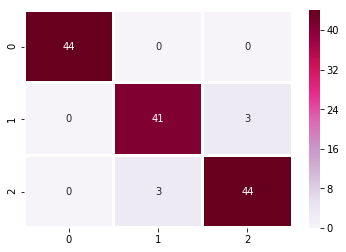

In [43]:
x = sns.heatmap(confusion_matrix(y_train, cv_gb), annot= True, cmap='PuRd', linewidths=2)

In [44]:
print(classification_report(cv_gb, y_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.93      0.93      0.93        44
          2       0.94      0.94      0.94        47

avg / total       0.96      0.96      0.96       135



# GaussianNB Classifier

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb_clf =  GaussianNB()

cv_gnb = cross_val_predict(gnb_clf, X_train, y_train, cv=10, n_jobs=4)

### performance measure

In [46]:
accuracy_score(y_train, cv_gnb)

0.9481481481481482

In [47]:
x = sns.heatmap(confusion_matrix(y_train, cv_gnb), annot= True, cmap='PuRd', linewidths=2)

In [48]:
print(classification_report(cv_gnb, y_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.91      0.93      0.92        43
          2       0.94      0.92      0.93        48

avg / total       0.95      0.95      0.95       135



# Support vector classifier

In [52]:
from sklearn.svm import SVC

### preprocessing steps

In [50]:
scale = StandardScaler()
scale.fit(X_train)
X_train_scale = scale.transform(X_train)

### cross validate classifier with hyper parameters

In [53]:
svc_clf =  SVC()
cv_svc = cross_val_predict(svc_clf, X_train_scale, y_train, cv=10, n_jobs=4)

### performance measure

In [55]:
accuracy_score(y_train, cv_svc)

0.9555555555555556

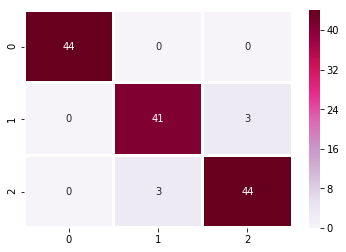

In [56]:
x = sns.heatmap(confusion_matrix(y_train, cv_svc), annot= True, cmap='PuRd', linewidths=2)

In [57]:
print(classification_report(cv_svc, y_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.93      0.93      0.93        44
          2       0.94      0.94      0.94        47

avg / total       0.96      0.96      0.96       135



### Tune hyper parameters with GridSearchCV

In [58]:
svc_clf =  SVC()

In [113]:
parameters={'C': [1.3,1.4,1.5],
            'kernel':['linear', 'rbf', 'poly'],
            'degree':[1, 2],
            'tol':[1e-13,1e-10],
            'gamma':[0.02,0.03],
            'coef0':[1e-13,1e-10]
           }

In [114]:
clf = GridSearchCV(svc_clf, param_grid=parameters, cv=10)

In [115]:
x = clf.fit(X_train_scale, y_train)

#### Best parameter 

In [116]:
clf.best_params_

{'C': 1.4,
 'coef0': 1e-13,
 'degree': 1,
 'gamma': 0.02,
 'kernel': 'linear',
 'tol': 1e-13}

### Cross validate classifier with best parameters

In [105]:
svc_clf =  SVC(**clf.best_params_)
cv_svc = cross_val_predict(svc_clf, X_train, y_train, cv=10, n_jobs=4)

### performance measure

In [106]:
accuracy_score(y_train, cv_svc)

0.9777777777777777

In [84]:
x = sns.heatmap(confusion_matrix(y_train, cv_svc), annot= True, cmap='PuRd', linewidths=2)

In [463]:
print(classification_report(cv_svc, y_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.95      1.00      0.98        42
          2       1.00      0.96      0.98        49

avg / total       0.99      0.99      0.99       135



# ANN - perceptron

In [464]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state=42, max_iter=650)

### Cross validate classifier with default hyper parameters

In [409]:
cv_p = cross_val_predict(per_clf, X_train, y_train, cv=10, n_jobs=4)

### performance measure

In [412]:
accuracy_score(y_train, cv_p)

0.7555555555555555

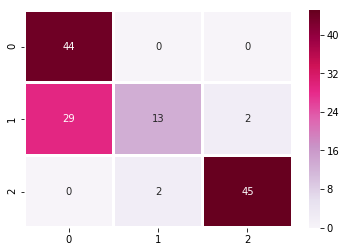

In [411]:
x = sns.heatmap(confusion_matrix(y_train, cv_p), annot= True, cmap='PuRd', linewidths=2)

In [394]:
print(classification_report(y_pred, cv_p))

             precision    recall  f1-score   support

          0       0.68      0.98      0.80        44
          1       0.83      0.47      0.60        43
          2       0.92      0.92      0.92        48

avg / total       0.81      0.79      0.78       135



### Tune hyper parameters with GridSearchCV 

In [465]:
parameter = {'max_iter': [250, 260, 265]}
per_clf = Perceptron(random_state=42)
clf = GridSearchCV(per_clf, param_grid=parameter, cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [250, 260, 265]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

#### best parameters

In [466]:
clf.best_params_

{'max_iter': 260}

### cross validate classifier with best hyper parameters

In [431]:
per_clf = Perceptron(random_state=42, max_iter=260)

cv_p = cross_val_predict(per_clf, X_train, y_train, cv=10, n_jobs=4)

### performance measure

In [432]:
accuracy_score(y_train, cv_p)

0.8962962962962963

In [434]:
x = sns.heatmap(confusion_matrix(y_train, cv_p), annot= True, cmap='PuRd', linewidths=2)

In [435]:
print(classification_report(y_pred, cv_p))

             precision    recall  f1-score   support

          0       0.86      0.98      0.91        44
          1       0.90      0.84      0.87        43
          2       1.00      0.94      0.97        48

avg / total       0.92      0.92      0.92       135



# LinearDiscriminantAnalysis 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()

### cross validate classifier

In [467]:
cv_lda = cross_val_predict(lda_clf, X_train, y_train, cv=10, n_jobs=4)

### performance measure

In [468]:
accuracy_score(y_train, cv_lda)

0.9777777777777777

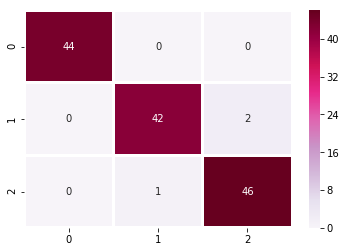

In [469]:
x = sns.heatmap(confusion_matrix(y_train, y_pred), annot= True, cmap='PuRd', linewidths=2)

In [405]:
print(classification_report(y_pred, y_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.95      0.98      0.97        43
          2       0.98      0.96      0.97        48

avg / total       0.98      0.98      0.98       135



# MNIST

In [300]:
from sklearn.datasets import fetch_mldata

In [316]:
mnist = fetch_mldata('MNIST original')
mnist.data.shape

(70000, 784)

In [306]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, random_state=42)

## Random Forest

In [307]:
rf_clf = RandomForestClassifier(random_state=42)
cv_rf = cross_val_predict(rf_clf, X_train, y_train, cv=10, n_jobs=4)

In [308]:
accuracy_score(y_train, cv_rf)

0.9475714285714286

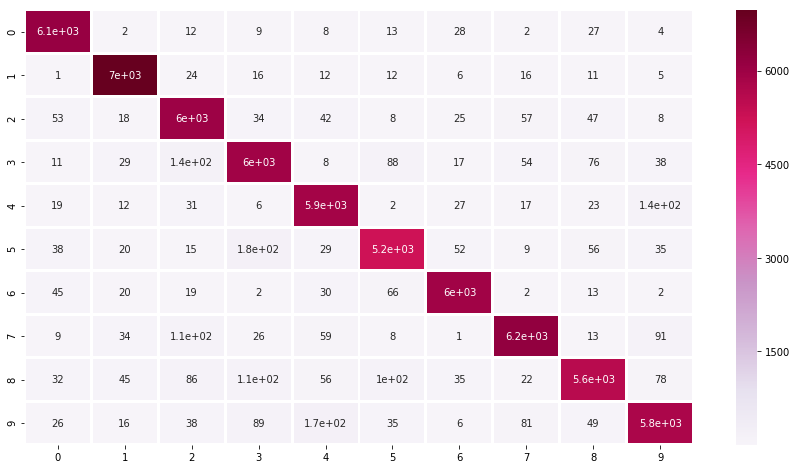

In [314]:
plt.figure(figsize=(15,8))
x = sns.heatmap(confusion_matrix(y_train, cv_rf), annot= True, cmap='PuRd', linewidths=2)

In [315]:
print(classification_report(cv_rf, y_train))

             precision    recall  f1-score   support

        0.0       0.98      0.96      0.97      6361
        1.0       0.99      0.97      0.98      7170
        2.0       0.95      0.93      0.94      6480
        3.0       0.93      0.93      0.93      6430
        4.0       0.96      0.93      0.94      6317
        5.0       0.92      0.94      0.93      5551
        6.0       0.97      0.97      0.97      6162
        7.0       0.95      0.96      0.95      6463
        8.0       0.91      0.95      0.93      5887
        9.0       0.92      0.94      0.93      6179

avg / total       0.95      0.95      0.95     63000



In [342]:
parameters = {'max_features': [80,90],
             'n_estimators': [100,110],
            'max_depth': [4,5],
            }

In [343]:
rf_clf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rf_clf, param_grid=parameters, cv=3, n_jobs=4)

In [345]:
gs.fit(X_train, y_train)

In [ ]:
gs.best_params_